In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
url =("/content/drive/MyDrive/Data Makul Multivariate /HousingData.csv", "r")

In [ ]:
# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/Data Makul Multivariate /HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Pisahkan fitur dan variabel target
X = df.drop('MEDV', axis=1)
y = df['MEDV']
# Tangani nilai yang hilang dengan SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standarisasi fitur-fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Regresi dengan OLS, Ridge, Lasso, dan Elastic-Net
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [ ]:
# Regresi OLS
try:
    ols = LinearRegression()
    ols.fit(X_train_scaled, y_train)
    y_pred_ols = ols.predict(X_test_scaled)
    mse_ols = mean_squared_error(y_test, y_pred_ols)
    print(f'OLS Regression MSE: {mse_ols}')
except Exception as e:
    print(f"Error pada regresi OLS: {e}")

OLS Regression MSE: 25.01767202384286


In [ ]:
# Regresi Ridge
try:
    ridge = Ridge(alpha=0.1)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print(f'Ridge Regression MSE: {mse_ridge}')
except Exception as e:
    print(f"Error pada regresi Ridge: {e}")

Ridge Regression MSE: 25.017936799283316


In [ ]:
# Regresi Lasso
try:
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print(f'Lasso Regression MSE: {mse_lasso}')
except Exception as e:
    print(f"Error pada regresi Lasso: {e}")

Lasso Regression MSE: 26.139744825292034


In [ ]:
# Regresi Elastic-Net
try:
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
    elastic_net.fit(X_train_scaled, y_train)
    y_pred_en = elastic_net.predict(X_test_scaled)
    mse_en = mean_squared_error(y_test, y_pred_en)
    print(f'Elastic-Net Regression MSE: {mse_en}')
except Exception as e:
    print(f"Error pada regresi Elastic-Net: {e}")

Elastic-Net Regression MSE: 25.549032307295793


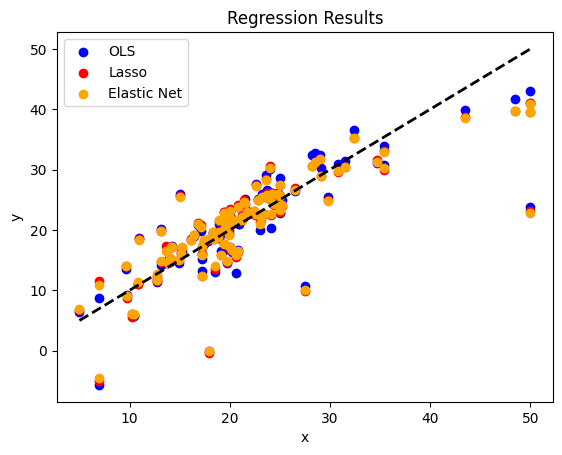

In [ ]:
try:
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  plt.scatter(y_test, y_pred_ols, color='blue', label='OLS')
  plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso')
  plt.scatter(y_test, y_pred_en, color='orange', label='Elastic Net')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Regression Results')
  plt.legend()
  plt.show()
except Exception as e:
    print(f"Error in OLS regression: {e}")